<a href="https://colab.research.google.com/github/sergiosiman/employee_schedueling/blob/main/EmployeeScheduelingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start Setup and include file path
Import the Pandas libary, and import all SkLearn libary functions needed. Also define the dataset path.

In [30]:
import pandas as pd                                   # for data handling
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.ensemble import RandomForestRegressor    # example model
from sklearn.metrics import mean_absolute_error       # evaluation metric
from sklearn.pipeline import Pipeline                 # make pipeline
from sklearn.impute import SimpleImputer              # impute missing values
from xgboost import XGBRegressor                      # extreme gradient boost model
import matplotlib.pyplot as plt                       # visualizing data

dataset_path = "/content/drive/MyDrive/Colab Notebooks/store_employee_dataset.csv"

print('Setup Complete')

Setup Complete


# Load data
Load the dataset into a variable and display first five rows for a preview.

In [31]:
# Create a DataFrame of the dataset file
df = pd.read_csv(dataset_path)
df.head()

,date,store_id,store_size,temp,rain_mm,humidity,is_weekend,is_15th_or_30th,is_holiday,promotion_level,daily_traffic,sales,required_employees
0,2023-01-01,store_1,150,30.9,4.0,70,1,0,1,0,300,4634.46,6
1,2023-01-02,store_1,150,34.0,0.1,88,0,0,0,0,224,4508.85,5
2,2023-01-03,store_1,150,27.9,0.6,50,0,0,0,2,469,4995.54,8
3,2023-01-04,store_1,150,29.6,1.2,56,0,0,0,1,382,4746.42,6
4,2023-01-05,store_1,150,28.7,0.2,72,0,0,0,0,215,4201.17,5


#Prepare features and target
Start the target variable, which the target is the required employees per store. As well as defining the features which the model will refer to when predicting.

In [32]:
#Define target variable
y = df['required_employees']

# Define features
features = [
    'store_size',
    'temp',
    'rain_mm',
    'humidity',
    'is_weekend',
    'is_15th_or_30th',
    'is_holiday',
    'promotion_level'
]
X = df[features]

#Split Data (Train/Test)
Split the data for training and one for testing to able to correctly validate the accuracy of the model. The data is split 80% for training and 20% for testing or validation.

In [33]:
#Split data into training/testing features and targets allocating 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Train Model with Pipeline
Create a pipeline that fills in missing values and trains a `RandomForestRegressor` with 100 trees. Fit the pipeline using the training data.



In [34]:
# Create a pipeline with imputation and model
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Optional but adds robustness
    ('model', RandomForestRegressor(n_estimators=100, random_state=1))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.44


#Evaluate the Model
Run tests to see the Mean Absolute Error ("inaccuracy percentage").

In [35]:
#Produce a prediction then use the SkLearn mean_absolute_error() function to calculate the MAE
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.44


#Make Predictions
Make predictions using the testing or validation variable.

In [36]:
# Predict using the testing features
predictions = pipeline.predict(X_test)
predictions

array([ 6.13,  9.46,  6.41,  7.62, 13.61,  7.44, 11.88,  6.4 ,  7.73,
       11.42, 13.61, 11.75, 11.39,  6.43,  7.3 , 13.25, 11.85, 10.54,
        9.  ,  4.94, 14.64, 11.48,  4.98,  7.76, 11.77,  4.99,  6.35,
       11.87,  7.35,  7.59,  7.33,  4.82, 10.82, 11.66, 11.66,  7.92,
        9.21,  5.  ,  7.43,  9.  ,  5.  ,  9.  , 11.73,  5.  ,  7.9 ,
       11.83,  9.  , 13.53,  9.3 , 13.53,  4.34,  9.  , 11.75, 12.59])

# Visualize Graphs
Predictions vs actual graph. As well as Mean Absolute Error.

Mean Absolute Error (MAE): 0.44


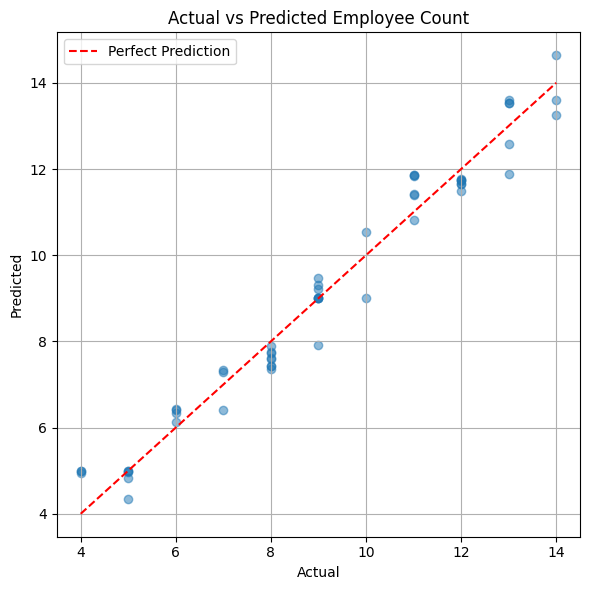

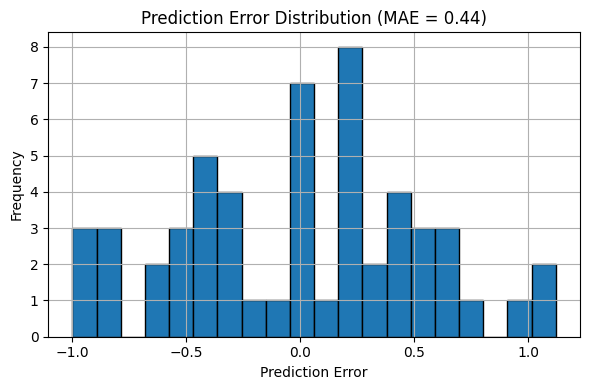

In [37]:
# Create a DataFrame to compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions
})

# Calculate MAE
mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Predicted'])
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.5)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         'r--', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Employee Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Error Distribution
errors = comparison_df['Actual'] - comparison_df['Predicted']
plt.figure(figsize=(6, 4))
plt.hist(errors, bins=20, edgecolor='black')
plt.title(f'Prediction Error Distribution (MAE = {mae:.2f})')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
